In [1]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
def change_df(df):
    new_df = df.loc[:, ['name_file_1', 'code_java_1', 'name_file_2', 'code_java_2', 'label']]
    
    new_df = new_df.rename(columns={'code_java_1': 'java_code_1', 'code_java_2': 'java_code_2', 'label': 'verdict'})

    return new_df

In [3]:
def balance_data(df):
    new_df = pd.concat([df[df['verdict'] == 1], df[df['verdict'] == 0].head(400)], ignore_index=True)

    return new_df

In [4]:
# Recopila data de los csv
def get_data(no_plagio, plagio, non_plagiarized, plagiarized):
    data1 = pd.read_csv(no_plagio)
    data2 = pd.read_csv(plagio)
    data3 = pd.read_csv(non_plagiarized)
    data4 = pd.read_csv(plagiarized)
    
    conplag = pd.concat([data3, data4], ignore_index=True)
    fire = pd.concat([data1, data2], ignore_index=True)
    conplag = change_df(conplag)

    data = pd.concat([fire, conplag], ignore_index=True)
    return data

In [5]:
# Devuelve los codigos
def get_features(data):
    features = data[['java_code_1', 'java_code_2']]
    return features

In [6]:
# Devuelve los labels (Plagio = 1, No Plagio = 0)
def get_labels(data):
    labels = data[['verdict']]
    return labels

In [7]:
# Convierte los codigos en secuencias de enteros para que puedan ser procesados
def tokenizar(features_train, features_test):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(features_train['java_code_1'] + features_train['java_code_2'])
    features_train_sequences_code1 = tokenizer.texts_to_sequences(features_train['java_code_1'])
    features_train_sequences_code2 = tokenizer.texts_to_sequences(features_train['java_code_2'])
    features_test_sequences_code1 = tokenizer.texts_to_sequences(features_test['java_code_1'])
    features_test_sequences_code2 = tokenizer.texts_to_sequences(features_test['java_code_2'])
    return features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2

In [8]:
# Asegurarse de que todas las secuencias tengan la misma longitud
def padding(train_f1, train_f2, test_f1, test_f2):
    max_train_f1 = max(len(seq) for seq in train_f1) 
    max_train_f2 = max(len(seq) for seq in train_f2)
    max_test_f1 = max(len(seq) for seq in test_f1)
    max_test_f2 = max(len(seq) for seq in test_f2)
    max_length = max(max_train_f1, max_train_f2, max_test_f1, max_test_f2)

    features_train_sequences_code1 = pad_sequences(
        train_f1,
        maxlen = max_length
    )

    features_train_sequences_code2 = pad_sequences(
        train_f2,
        maxlen = max_length
    )

    features_test_sequences_code1 = pad_sequences(
        test_f1,
        maxlen = max_length
    )

    features_test_sequences_code2 = pad_sequences(
        test_f2,
        maxlen = max_length
    )
    print(max_length)

    return features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2

In [9]:
data = get_data(
    'codigos_no_plagio.csv',
    'codigos_plagio.csv',
    'non_plagiarized_java_pairs/non_plagiarized_java_pairs.csv',
    'plagiarized_java_pairs.csv'
)

In [10]:
data = balance_data(data)

In [11]:
features = get_features(data)
labels = get_labels(data)

In [12]:
# Split de Train y Test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [13]:
import pandas as pd

path1 = './Pruebas/prueba1.java'
path2 = './Pruebas/prueba2.java'
path3 = './Pruebas/prueba3.java'
path4 = './Pruebas/prueba4.java'
path5 = './Pruebas/prueba5.java'
path6 = './Pruebas/prueba6.java'
path7 = './Pruebas/prueba7.java'
path8 = './Pruebas/prueba8.java'
path9 = './Pruebas/prueba9.java'
path10 = './Pruebas/prueba10.java'

# Cargar los codigos
code1 = open(path1, 'r').read()
code2 = open(path2, 'r').read()
code3 = open(path3, 'r').read()
code4 = open(path4, 'r').read()
code5 = open(path5, 'r').read()
code6 = open(path6, 'r').read()
code7 = open(path7, 'r').read()
code8 = open(path8, 'r').read()
code9 = open(path9, 'r').read()
code10 = open(path10, 'r').read()

# Crear un dataframe con los codigos
codigos = pd.DataFrame({'java_code_1': [code1, code3, code5, code7, code9], 'java_code_2': [code2, code4, code6, code8, code10]})


In [14]:
import pandas as pd

# Suponiendo que df1 es tu primer dataframe con 9432 filas
# y df2 es tu segundo dataframe con 1 fila

# Utiliza concat para agregar df2 a df1
features_test = pd.concat([features_test, codigos], ignore_index=True)

# Verifica el resultado
features_test.count()


java_code_1    152
java_code_2    152
dtype: int64

In [15]:
# Codigos en secuencias de enteros
features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2 = tokenizar(
    features_train, 
    features_test
)

In [16]:
# Todas las secuencias tengan la misma longitud
features_train_code1, features_train_code2, features_test_code1, features_test_code2 = padding(
    features_train_sequences_code1,
    features_train_sequences_code2,
    features_test_sequences_code1,
    features_test_sequences_code2
)

4646


In [17]:
# Concatenar las secuencias de entrenamiento y prueba
features_train_concatenated = np.concatenate(
    (features_train_code1, features_train_code2), 
    axis=1
)
features_test_concatenated = np.concatenate(
    (features_test_code1, features_test_code2), 
    axis=1
)

In [19]:
# Entrenamiento del modelo XGBoost
xgb_classifier = XGBClassifier()
xgb_classifier.fit(features_train_concatenated, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Predicciones con XGBoost
y_pred_xgb = xgb_classifier.predict(features_test_concatenated)

In [25]:
labels_prediction_added = y_pred_xgb
y_pred_xgb = y_pred_xgb[:-5]

In [22]:
last_5_predicciones = labels_prediction_added[-5:]

In [23]:
count = 1 
for prediccion in last_5_predicciones:

    if prediccion == 1:
        print(f"Pareja {count} Plagio!")
        count+=1
    else:
        print(f"Pareja {count} No Plagio")
        count+=1

Pareja 1 Plagio!
Pareja 2 No Plagio
Pareja 3 No Plagio
Pareja 4 No Plagio
Pareja 5 Plagio!


In [26]:
# Evaluación del modelo XGBoost
accuracy_xgb = accuracy_score(labels_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")
print(classification_report(labels_test, y_pred_xgb))

XGBoost Classifier Accuracy: 0.782312925170068
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        75
           1       0.87      0.65      0.75        72

    accuracy                           0.78       147
   macro avg       0.80      0.78      0.78       147
weighted avg       0.80      0.78      0.78       147



Confusion Matrix:
 [[68  7]
 [25 47]]


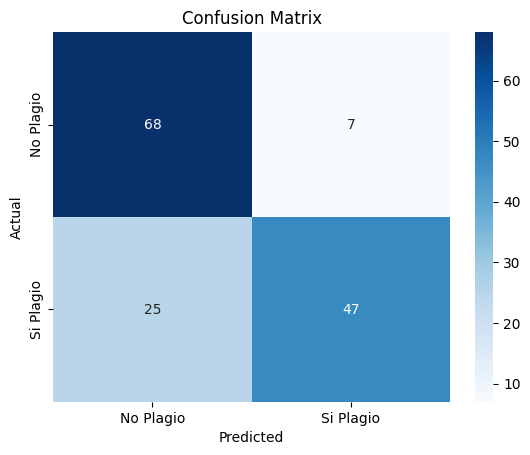

In [27]:
cm = confusion_matrix(labels_test, y_pred_xgb)
print('Confusion Matrix:\n', cm)

# Assuming cm is the confusion matrix
labels = ['No Plagio', 'Si Plagio']  # Replace with your class labels

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)

# Show the plot
plt.show()